# Mixing line example

## Draw a tephigram with points at 800 and 700 hPa

We want a mxing line between two points.  The lower point has a $\theta_e$ of 338 K
and a LCL of 860 hPa, and the upper point has  a $\theta_e$ of 332 K and an LCL of 700 hPa.  We want to
draw the lower point at 900 hPa and the upper point at 800 hPa.

We need to find the temperature and dewpoint from the LCL and thetae for both levels.

Once we've got the mixing line, we can calculate the temperature and mixing ratio of any potential mixtures at any pressure.

In [1]:
## Blank tephigram

In [2]:
from a405.thermo.thermlib import (find_Tmoist,find_rsat,find_thetaet,find_thetaep,
                                  find_thetaes, find_Td,tinvert_thetae,find_theta,
                                  convertTempToSkew,find_lcl)
import a405.thermo.thermlib as tl
from a405.thermo.constants import constants as c
from matplotlib import pyplot as plt
import numpy as np

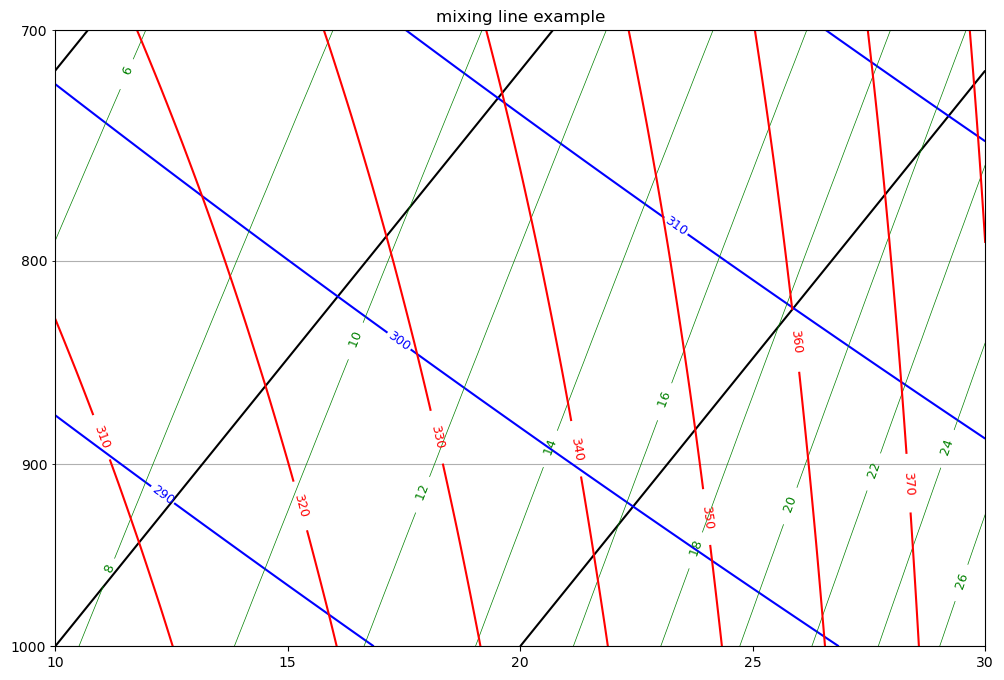

In [3]:
pa2hPa=1.e-2
from a405.skewT.fullskew import makeSkewWet
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax, skew = makeSkewWet(ax,corners=[10,30])
ax.set(ylim=[1000,700])
skewLimits = convertTempToSkew([10, 30], 1.e3, skew)
out=ax.set(xlim=skewLimits)
ax.set_title("mixing line example");

## Check thetae with line

press_levs = np.arange(1000,700,-10)*1.e2
thetae_target = 340
rvtot = 30e-3
xpoints = []
for press in press_levs:
    # 
    temp = find_Tmoist(thetae_target,press)
    xplot=convertTempToSkew(temp - c.Tc,press*pa2hPa,skew)
    xpoints.append(xplot)

ax.plot(xpoints,press_levs*pa2hPa,'g-',lw=5)
ax.set_title("moist adiabat check")
display(fig)
    
    

## Add mixing line points

### Find coords of lower point at its LCL

In [4]:
pa2hpa=1.e-2
kg2g = 1.e3
lcl_press=860.e2 #Pa  LCL
thetae_900=350.  #K
#
# thetae doesn't change between pressure levels
#
Temp_860=find_Tmoist(thetae_900,lcl_press) #Temp LCL
rv_860=find_rsat(Temp_860,lcl_press)  #just saturated at the LCL
rv_900 = rv_860  #vapor is conserved
rt_900 = rv_900
Tdew_860=Temp_860
print((f"temp,Tdew,rv at LCL press:  {lcl_press*pa2hpa:0.1f} hPa\n"),
      (f"Temp: {Temp_860- c.Tc:.1f} deg C\n" ),
      (f"Tdew: {Tdew_860 - c.Tc:.1f} deg C\n"),
      (f"rv: {rv_860*kg2g:.1f} g/kg"))

temp,Tdew,rv at LCL press:  860.0 hPa
 Temp: 19.1 deg C
 Tdew: 19.1 deg C
 rv: 16.4 g/kg


## check round trip

### First find_thetaes

find_thetaes(Temp, press)

In [5]:
find_thetaes(Tdew_860,860.e2)

349.99999999999767

## Next find_thetaet
find_thetaet(Td, rt, T, p)

In [6]:
Td = Tdew_860
Temp = Temp_860
press=lcl_press
rt = rv_860
find_thetaet(Td,rt,Temp,press)

349.99999999999767

### Now bring it down a moist adiabat to 900 hPa

Add the temperature and dewpoint to the chart

In [7]:
#
# now descend adiabatically to 900 hPa
#
press=900.e2
Temp_900,rv_900,rl_900=tinvert_thetae(thetae_900,rv_900,press)
Tdew_900=find_Td(rv_900,press)
print((f"temp,Tdew,rv at:  {press*pa2hpa:0.1f} hPa\n"),
      (f"Temp: {Temp_900- c.Tc:.1f} deg C\n" ),
      (f"Tdew: {Tdew_900 - c.Tc:.1f} deg C\n"),
      (f"rv: {rv_900*1.e3:.1f} g/kg"))
#
#  draw these on the sounding at 900 hPa as a red circle and blue diamond
#
xplot=convertTempToSkew(Temp_900 - c.Tc,press*pa2hPa,skew)
bot=ax.plot(xplot, press*pa2hPa, 'ro', markersize=14, markerfacecolor='r')
xplot=convertTempToSkew(Tdew_900 - c.Tc,press*pa2hPa,skew)
bot=ax.plot(xplot, press*pa2hPa, 'bd', markersize=14, markerfacecolor='b')

temp,Tdew,rv at:  900.0 hPa
 Temp: 22.7 deg C
 Tdew: 19.8 deg C
 rv: 16.4 g/kg


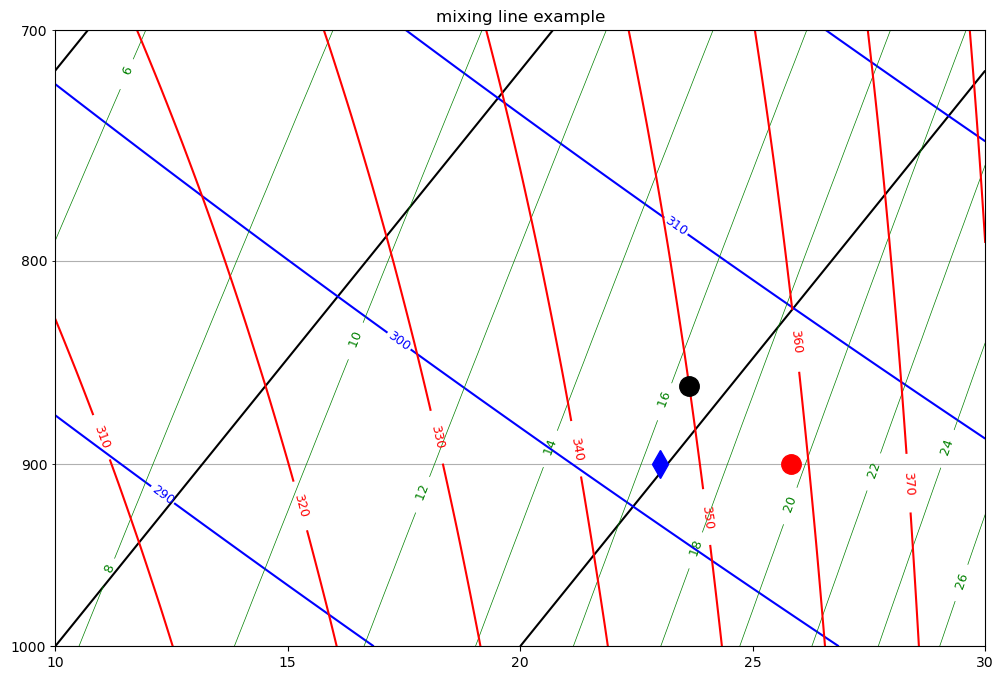

In [8]:
#
# add the LCL
#
press=860.e2
xplot=convertTempToSkew(Temp_860 - c.Tc,press*pa2hPa,skew)
bot=ax.plot(xplot, press*pa2hPa, 'ko', markersize=14, markerfacecolor='k')
display(fig)

## check $\theta_e$

In [9]:
Tdew_900,Temp_900

(292.99022379554617, 295.81602632741715)

In [10]:
find_thetaet(Tdew_900,rv_900,Temp_900,900.e2)

350.00000000000017

## check $\theta$

find_theta(temp, press, rv=0)

In [11]:
theta_lcl = find_theta(Temp_860, 860.e2)
print(f"{theta_lcl=:0.2f}")

theta_lcl=305.12


In [12]:
theta_900 = find_theta(Temp_900,900.e2)
print(f"{theta_900=:0.2f}")

theta_900=304.85


### Find coords of upper point at its LCL

LCL is 720 hPa and $\theta_e$ is 343 K

In [13]:
press_lcl=720.e2  #LCL Pa
thetae_800=343.  #K
Temp_lcl=find_Tmoist(thetae_800,press_lcl)
Tdew_lcl = Temp_lcl
rv_lcl=find_rsat(Temp_lcl,press_lcl)
print((f"temp,Tdew,rv at LCL press:  {press_lcl*pa2hpa:0.1f} hPa\n"),
      (f"Temp: {Temp_lcl- c.Tc:.1f} deg C\n" ),
      (f"Tdew: {Tdew_lcl-c.Tc:.1f} deg C\n"),
      (f"rv: {rv_lcl*kg2g:.1f} g/kg\n"))
# get the temperature and dewpoint at 800 hPa
#

temp,Tdew,rv at LCL press:  720.0 hPa
 Temp: 10.6 deg C
 Tdew: 10.6 deg C
 rv: 11.3 g/kg



In [14]:
thetaet = find_thetaet(Tdew_lcl,rv_lcl,Temp_lcl,press_lcl)
thetaet

343.00000000000017

## now bring down from 720 to 800 hPa

In [15]:
press=800.e2
rv_800=rv_lcl   #total water is conserved
rt_800 = rv_800
Temp_800,rv_800,rl=tinvert_thetae(thetae_800,rv_800,press)
Tdew_800=find_Td(rv_800,press)
print((f"temp,Tdew,rv at top level press:  {press*pa2hpa:0.1f} hPa\n"),
      (f"Temp: {Temp_800- c.Tc:.1f} deg C\n" ),
      (f"Tdew: {Tdew_800 - c.Tc:.1f} deg C\n"))

temp,Tdew,rv at top level press:  800.0 hPa
 Temp: 18.9 deg C
 Tdew: 12.2 deg C



## check thetae

should be equal to 343 K

In [16]:
thetaet = find_thetaet(Tdew_800,rt_800,Temp_800,press)
thetaet

343.00000000000017

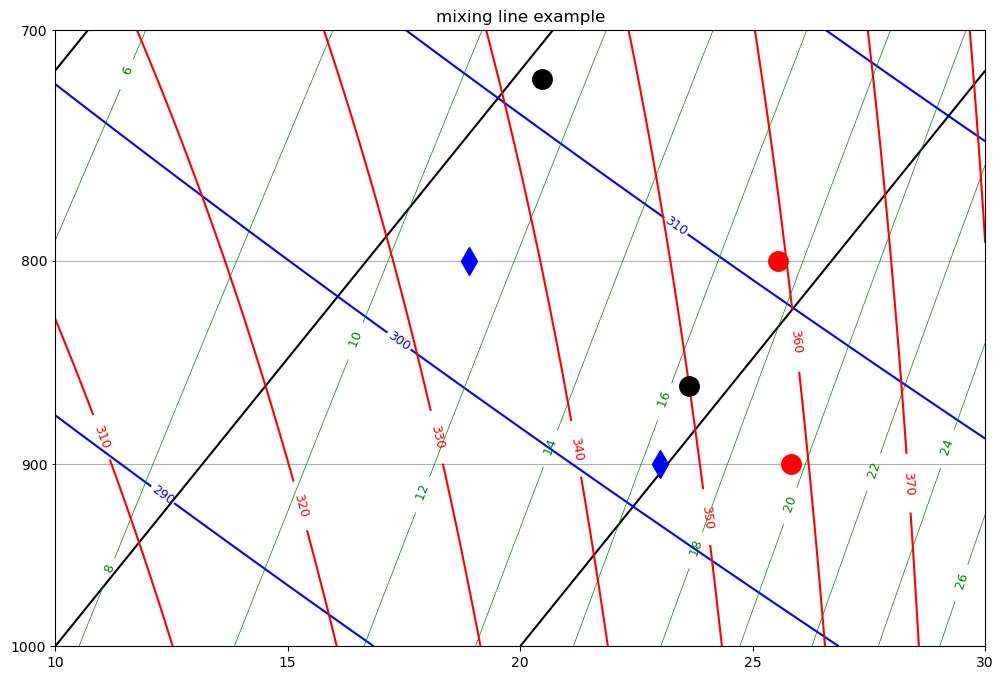

In [17]:
#
# put these points on the sounding at 800 hPa
#
xplot=convertTempToSkew(Temp_800 - c.Tc,press*pa2hPa,skew)
bot=ax.plot(xplot, press*pa2hPa, 'ro', markersize=14, markerfacecolor='r')
xplot=convertTempToSkew(Tdew_800 - c.Tc,press*pa2hPa,skew)
bot=ax.plot(xplot, press*pa2hPa, 'bd', markersize=14, markerfacecolor='b')
press = press_lcl
xplot=convertTempToSkew(Temp_lcl - c.Tc,press*pa2hPa,skew)
bot=ax.plot(xplot, press_lcl*pa2hPa, 'ko', markersize=14, markerfacecolor='k')
display(fig)
fig.savefig('mid-tephi.pdf')

## Question

Suppose air at 900 hPa lifts adiabatically to 800 hPa and mixes in 50% environment air.  What is the temperature and mixing ratio of that mixture at 800 hPa?  Is it saturated or unsaturated?

## Find mixture LCL at 800 mb

In [18]:
f = 0.
thetae_mix = f*thetae_900 + (1-f)*thetae_800
thetae_mix
f=0.3

In [19]:
rt_mix = f*rt_900 + (1-f)*rt_800
rt_mix

0.012799782262485765

In [20]:
press=800.e2
T_mix,rv_mix,rl_mix = tinvert_thetae(thetae_mix,rt_mix,press)

In [21]:
rl_mix

0

In [22]:
Td_mix = find_Td(rv_mix,press)

In [23]:
find_lcl(Td_mix,T_mix,press)

(286.98804418547047, 78433.02901904368)